# ***Title***: Project 4 - *Artificial Neural Network for Email Spam data*
## ***Author***: Ian R. Stewart
## ***Course***: COSC528 : Fall 2018

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random # Using to randomize initial weights
import time
import warnings
warnings.filterwarnings("ignore")

> #### **IMPORTING DATA**

In [3]:
inPath = './'
outPath = inPath+'Figures/'
features = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam class']
df = pd.read_csv(inPath+'spambase.data',names=features)

In [4]:
df.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam class
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,1


## 1) Data Exploration

In [5]:
print 'dataframe shape:\t(%i,%i)'%(df.shape[0],df.shape[1])
np.round(df.describe(),2)

dataframe shape:	(4601,58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam class
count,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,...,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00
mean,0.10,0.21,0.28,0.07,0.31,0.10,0.11,0.11,0.09,0.24,...,0.04,0.14,0.02,0.27,0.08,0.04,5.19,52.17,283.29,0.39
std,0.31,1.29,0.50,1.40,0.67,0.27,0.39,0.40,0.28,0.64,...,0.24,0.27,0.11,0.82,0.25,0.43,31.73,194.89,606.35,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.59,6.00,35.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.00,0.00,0.00,0.00,2.28,15.00,95.00,0.00
75%,0.00,0.00,0.42,0.00,0.38,0.00,0.00,0.00,0.00,0.16,...,0.00,0.19,0.00,0.32,0.05,0.00,3.71,43.00,266.00,1.00
max,4.54,14.28,5.10,42.81,10.00,5.88,7.27,11.11,5.26,18.18,...,4.38,9.75,4.08,32.48,6.00,19.83,1102.50,9989.00,15841.00,1.00


> **Checking for empty arrays in matrix.**

In [6]:
# Iterating through df, searching for .isnull().any()
count = 0; indexes = []
for i in df.isnull().any():
    if i == True:
        indexes.append(count)
    count+=1
if len(indexes)>0:
    print 'FEATURES WITH MISSING DATA: %s'%df.columns.values[indexes]
else:
    print 'NO MISSING DATA IN DATAFRAME.'

NO MISSING DATA IN DATAFRAME.


In [7]:
# Checking for negative values in dataset
for i in df:
    [j for j in df[i] if j < 0]

> **NO EMPTY data entries or NEGATIVE values in columns. Now, let's examine the data types for each data feature (column)**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

>**All features are either float64 or int64, which is ideal as an object return would require further investigation into the data feature to track down why Python is reading the column as a non-float or -int. Now, let's see how many zero-valued entries are in each feature.**

In [99]:
print 'FEATURE NAME \t\tNo. Zero-valued Entries'
print '-------------------------------------------------'
for i in df:
    zeros = 0
    for j in df[i]:
        if ( (j==0)or(j==0.0) ):
            zeros+=1
    print '%s   \t\t\t%i'%(i,zeros)

FEATURE NAME 		No. Zero-valued Entries
-------------------------------------------------
word_freq_make   			3548
word_freq_address   			3703
word_freq_all   			2713
word_freq_3d   			4554
word_freq_our   			2853
word_freq_over   			3602
word_freq_remove   			3794
word_freq_internet   			3777
word_freq_order   			3828
word_freq_mail   			3299
word_freq_receive   			3892
word_freq_will   			2276
word_freq_people   			3749
word_freq_report   			4244
word_freq_addresses   			4265
word_freq_free   			3360
word_freq_business   			3638
word_freq_email   			3563
word_freq_you   			1374
word_freq_credit   			4177
word_freq_your   			2178
word_freq_font   			4484
word_freq_000   			3922
word_freq_money   			3866
word_freq_hp   			3511
word_freq_hpl   			3790
word_freq_george   			3821
word_freq_650   			4138
word_freq_lab   			4229
word_freq_labs   			4132
word_freq_telnet   			4308
word_freq_857   			4396
word_freq_data   			4196
word_freq_415   			4386
word_freq_85   			4116
word_freq_technol

> **After initial pruning of the data, I observed an odd behaviour where the majority of the data entries examined (at random) contained a 1.0 spam classification indicating that the email was, in fact, spam. I want to plot the data to look if all the data are in fact spam.**

Text(0.5,0,'Entry Index in Dataframe')

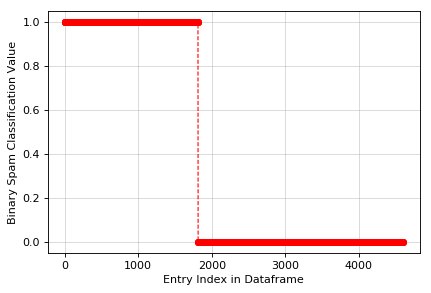

In [9]:
fig,ax = plt.subplots(dpi=80)
ax.plot(df['spam class'].values,'ro--',linewidth=1,markersize=5)
ax.grid(alpha=0.5)
ax.set_ylabel('Binary Spam Classification Value')
ax.set_xlabel('Entry Index in Dataframe')
#plt.savefig(outPath+'Initial_Classification_Investigation.png',dpi=400)

> **My hypothesis failed, where all data entries are assigned to one class (spam or non-spam). Let's count the spam classifications.**

In [10]:
print '[No. of Spam , No. of non-Spam]\t :  [%i , %i]'%(list(df['spam class']).count(0),list(df['spam class']).count(1))

[No. of Spam , No. of non-Spam]	 :  [2788 , 1813]


> **This shows that ~40% (1813/4601) of the data are classified as SPAM with the remaining ~60% (2788/4601) being non-SPAM. Another observation is that the classifications are actually grouped together, where the SPAM classifications are the FIRST 1813 entries and the latter portion of the dataframe are ALL non-SPAM classifications. This is an interesting finding, as a small training-test split for a cross-validation study can potentially cause classification errors if the an sufficient amount of each group is not represented in the training set.**

## 2) Data Analysis

Creating training-test split function for cross-validation study later.

### **Creating ANN class**

In [11]:
class ANN(object):
    import time
    '''
    ------------------------- DESCRIPTION ---------------------------
    ANN : artificial neural network using forward+backward propagation
    Description: The general flow of this ANN class is as follows:
            1. Split data into Training and Test set
        On training data, perform:
            2. Initialize weights for given number of hidden layers
            3. Forward propagate and calc output
            4. Back propagate errors
                a. reverse network
                b. calculate error between output layer
                c. calculate error for weights using
                    derivative of activation function
                d. update weights until input layer reached
            CONTINUE UNTIL CONVERGENCE OR ERROR RATE ADEQUATE
        On test data, perform:
            1. classification decision using training weights
    ------------------------------------------------------------------
    '''
    def __init__(self,data,n_inputs,n_hidden,n_neurons,n_outputs,activation_func,learning_rate,printer=True):
        self.data = data
        self.n_inputs  = n_inputs
        self.n_hidden  = n_hidden
        self.n_neurons = n_neurons
        self.n_outputs = n_outputs
        self.learning_rate = learning_rate
        self.activation_func = 'sigmoid'
        self.printer = printer
        # Checking input value for activation function
        if (activation_func!='sigmoid')and(activation_func!='linear')and(activation_func!='softmax'):
            print 'Input value:\t%s'%activation_func
            print
            print 'CHOOSE CORRECT ACTIVIATION FUNCTION FROM LIST:\n1.\tsigmoid\n2.\tlinear\n3.\tsoftmax'
            print
        else:
            pass
      
    def test_split(self,data,n):
        '''
        :param data : { array } feature data
        :param n    : { int   } percentage of split in training
        '''
        data = np.asarray(data)
        length_test = int(round(len(data)*(n/100.)))
        
        # Create random integers between two numbers with no repeats
        train_list = random.sample(range(0,len(data)), length_test)
        train_list.sort()
        test_list = np.arange(0,len(data))
        test_list = np.delete(test_list,train_list)
        
        self.data_train = np.array(data[train_list]) ; random.shuffle(self.data_train)
        self.data_test  = np.array(data[test_list])  ; random.shuffle(self.data_test)
        if self.printer:
            print 'CHECK: Original data shape of (%i,%i) and splits shapes:\n\ttraining_data:\t(%i,%i)\n\ttest_data:\t(%i,%i)'\
                    %(data.shape[0],data.shape[1],self.data_train.shape[0],self.data_train.shape[1],\
                      self.data_test.shape[0],self.data_test.shape[1])
        return

    def initialize(self,number_inputs,number_hidden,number_neurons,number_outputs):
        '''
        Description : Initialize weights for constructed network. Weight values for the 
                        hidden layer weights contain a +1 value to account for the bias 
                        at each layer.
        
        :param number_inputs  : { int } number of inputs in input layer
        :param number_hidden  : { int } number of hidden layers in network
        :param number_neurons : { int } number of neurons in hidden layer
        :param number_outputs : { int } number of outputs in output layer
        '''
        network = []
        for i in range(number_hidden):
            # empty, initialize network
            if i==0:
                hidden_layer = [{'weights':[random.uniform(0, 1) for i in range(number_inputs + 1)]} for i in range(number_neurons)]
                network.append(hidden_layer) 
            # append after initializations
            else:
                hidden_layer = [{'weights':[random.uniform(0, 1) for i in range(number_neurons + 1)]} for i in range(number_neurons)]
                network.append(hidden_layer)
        output_layer = [{'weights':[random.uniform(0, 1) for i in range(number_neurons + 1)]} for i in range(number_outputs)]
        network.append(output_layer)
        return network
    
    def activate(self,weights,inputs):
        '''
        activate : neuron activation function calculated
                    by the weighted sum of inputs plus bias.
                    Bias is positioned to final value in the list.
        '''
        activation = weights[-1] # initialize 
        #print len(weights),len(inputs)
        for i in range(len(weights)-1):
            activation = activation + weights[i] * inputs[i]
        return activation

    def activation_function(self,value,values=None):
        '''
        activation_function : activation function for weight calc
        '''
        if (self.activation_func=='sigmoid') or (self.activation_func=='logistic sigmoid'):
            return (1.0 + np.exp(-value))**-1
        if self.activation_func=='linear':
            return value
        if self.activation_func=='softmax':
            return np.exp(value)/np.sum(values)
    
    def activation_derivative(self,value):
        '''
        activation_derivative : derivative of activation function
        '''
        if (self.activation_func=='sigmoid') or (self.activation_func=='logistic sigmoid'):
            return value*(1.0 - value)
        if self.activation_func=='linear':
            return 1.0
        if self.activation_func=='softmax':
            return value * (1.0 - value)
        
    def forward(self,network,values):
        '''
        forward : forward propagation of weights through network
        '''
        inputs = values
        for layer in network:
            new_inputs = []
            for neuron in layer:
                activation = self.activate(neuron['weights'], inputs)
                neuron['output'] = self.activation_function(activation)
                new_inputs.append(neuron['output'])
            inputs = new_inputs
        return inputs
    
    def backward(self,network,known):
        '''
        backward : backward propagation of errors through network
                    calculated with known/given network values
        '''
        for i in range(len(network))[::-1]:
            current_layer = network[i]; errors = []
            # initialize errors for output layer
            if i == len(network)-1:
                for j in range(len(current_layer)):
                    neuron = current_layer[j]
                    errors.append(self.expected[j] - neuron['output'])
            # calculate errors once output layer finished
            else:
                for j in range(len(current_layer)):
                    error = float(0)
                    # calculate error between i and i+1 layer
                    for neuron in network[i+1]:
                        weight = neuron['weights'][j]
                        error  = error + weight * neuron['error']
                    errors.append(error)
            # append dictionary with updated error correction                  
            for j in range(len(current_layer)):
                neuron = current_layer[j]
                neuron['error'] = errors[j] * self.activation_derivative(neuron['output'])
        return
    

    def update_weights(self,network, row, learning_rate):
        '''
        update_weights : updates weights using stochastic gradient descent
        '''
        for i in range(len(network)):
            inputs = row[:-1]
            if i != 0:
                inputs = [neuron['output'] for neuron in network[i - 1]]
            for neuron in network[i]:
                # Updating weights based on input, learning rate, and calculated error
                for j in range(len(inputs)):
                    neuron['weights'][j] = neuron['weights'][j] + learning_rate * neuron['error'] * inputs[j]
                # Updating bias
                neuron['weights'][-1] = neuron['weights'][-1] + learning_rate * neuron['error']
        self.network = network
        return network
        
    def main(self,split,n_epochs):
        '''
        train : runs ANN with provided network structure and updates weights along the way
        '''
        self.test_split(self.data,split)
        network = self.initialize(self.n_inputs,self.n_hidden,self.n_neurons,self.n_outputs)
        self.n_inputs = self.n_inputs-1
        #print np.array(network).shape
        error_dict = {}
        # --- TRAINING NETWORK --- #
        start = time.time()
        end = 0
        checker = True
        for epoch in range(n_epochs):
            total_error = float(0)
            count_pos = 0 ; count_neg = 0
            for row in self.data_train:
                #print row
                outputs = self.forward(network, row)
                self.expected = np.zeros(self.n_outputs)
                self.expected[-1] = 1
                #print self.expected,outputs # *******Test this output comparison********
                #print len(self.expected),len(outputs),outputs
                for i in range(len(self.expected)):
                    ex = list(self.expected)
                    out= list(outputs)
                    if ex.index(max(ex)) == out.index(max(out)):
                        count_pos += 1
                    else:
                        count_neg += 1
                total_error = total_error + sum([(self.expected[i]-outputs[i])**2 for i in range(len(self.expected))])
                self.backward(network, self.expected)
                self.update_weights(network, row,self.learning_rate)
            error_value = float(count_pos)/float(count_pos+count_neg)
            if checker:
                end = time.time() ; delta = end-start
                checker = False
            else:
                now = time.time() - end
                end = end + now ; delta = end - start
            if self.printer:
                print 'epoch: %i  \terror: %.4f\ttime: %.1f   (seconds)'%(epoch+1,total_error,delta)
            error_dict[epoch+1] = total_error
            
        # --- MAKE PREDICTIONS --- #
        predicted_values = []
        # row = data entry in dataset
        for row in np.array(self.data_test):
            outputs = self.forward(self.network, row)
            #print row[-1],outputs
            predicted_values.append(outputs)

        return error_dict,predicted_values

## Running created ANN Class

Training network on dataset with 57 features and 2 outputs. The number of hidden layers and the number of neurons per hidden layer are variable. I start by ***NORMALIZING*** the dataframe.

In [20]:
# Normalizing the dataframe
df_norm = (df - df.mean()) / (df.max() - df.min())

# ANN(data,n_inputs,n_hidden,n_neurons,n_outputs,activation_func,learning_rate)
X = ANN(df_norm, #data
        57,  # number of inputs
        2,   # number of hidden layers
        2,   # number of neurons per hidden layer
        2,   # number of outputs (2)
        'sigmoid', # activation function
        0.3, # learning rate
        printer=True # prints error per epoch (used during diagnostic testing)
       )
total_error,outputs = X.main(60,25)

CHECK: Original data shape of (4601,58) and splits shapes:
	training_data:	(2761,58)
	test_data:	(1840,58)
epoch: 1  	error: 22.4583	time: 0.7   (seconds)
epoch: 2  	error: 0.9433	time: 1.4   (seconds)
epoch: 3  	error: 0.5351	time: 2.2   (seconds)
epoch: 4  	error: 0.3733	time: 2.9   (seconds)
epoch: 5  	error: 0.2863	time: 3.6   (seconds)
epoch: 6  	error: 0.2319	time: 4.3   (seconds)
epoch: 7  	error: 0.1948	time: 5.0   (seconds)
epoch: 8  	error: 0.1679	time: 5.8   (seconds)
epoch: 9  	error: 0.1474	time: 6.5   (seconds)
epoch: 10  	error: 0.1313	time: 7.2   (seconds)
epoch: 11  	error: 0.1184	time: 7.9   (seconds)
epoch: 12  	error: 0.1078	time: 8.6   (seconds)
epoch: 13  	error: 0.0989	time: 9.3   (seconds)
epoch: 14  	error: 0.0913	time: 10.1   (seconds)
epoch: 15  	error: 0.0848	time: 10.8   (seconds)
epoch: 16  	error: 0.0792	time: 11.5   (seconds)
epoch: 17  	error: 0.0743	time: 12.2   (seconds)
epoch: 18  	error: 0.0699	time: 12.9   (seconds)
epoch: 19  	error: 0.0660	time: 

Accuracy of network: 77.0 %


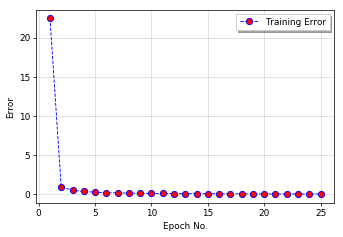

In [21]:
# ------ Plotting results ------ #
x = [i for i in total_error]
y = [total_error[i] for i in total_error]
fig,ax = plt.subplots(1,1,dpi=64)
ax.plot(x,y,'bo--',linewidth=1,markerfacecolor='red',markersize=7,label='Training Error')
ax.legend(loc='upper right',fancybox=False,shadow=True)
ax.grid(alpha=0.5)
ax.set_xlabel('Epoch No.')
ax.set_ylabel('Error')
if False:
    plt.savefig(inPath+'Figures/Training_error.png',dpi=400)

# ------ Calculating the prediction accuracy of network ------ #
known = np.array([i[-1] for i in X.data_test])
known_values = (known - known.mean()) / (known.max() - known.min())
known_values = np.asarray(known_values)
count_pos = 0 ; count_neg = 0
for i in range(len(known_values)):
    if (known_values[i]>0.0)and(outputs[i]>0.0):
        count_pos+=1
    elif (known_values[i]<0.0)and(outputs[i]<0.0):
        count_pos+=1
    else:
        count_neg+=1
print 'Accuracy of network: %.1f %%'%(float(count_pos)/float(count_pos+count_neg)*100)

#### Creating confusion matrix function for illustrating network predictive power.

In [14]:
def predict_accuracy(test_set,predicted,prints=True):
    known = np.array([i[-1] for i in test_set])
    known_values = (known - known.mean()) / (known.max() - known.min())
    TN=0;FN=0;TP=0;FP=0
    for i in range(len(known_values)):
        if (known_values[i]>0.0)and(predicted[i]>0.0):
            TP+=1
        elif (known_values[i]<0.0)and(predicted[i]<0.0):
            TN+=1
        elif (known_values[i]>0.0)and(predicted[i]<0.0):
            FN+=1
        elif (known_values[i]<0.0)and(predicted[i]>0.0):
            FP+=1
    if prints:
        print '======== CONFUSION MATRIX ========'
        print '\t\tPREDICTED CLASS\n\t\t---------------\nTRUE CLASS  |  NONSPAM\SPAM\n  NONSPAM    |\t%i\t%i\n  SPAM |\t%i\t%i'%(TN,FP,FN,TP)
        print '=================================='
    return TN,FN,TP,FP
def getMetrics(TN,FN,TP,FP,prints=True):
    TN,FN,TP,FP=float(TN),float(FN),float(TP),float(FP)
    Acc = (TN+TP)/(TN+TP+FN+FP)
    TPR = TP/(TP+FN)
    PPV = TP/(TP+FP)
    TNR = TN/(TN+FP)
    F1  = (2*PPV*TPR)/(PPV+TPR)
    if prints:
        metrics = [Acc,F1]
        labels = ['Acc.','F1']
        print '====== Performance Metrics ======'
        for i in range(len(labels)):
            print '\t%s\t: %.4f'%(labels[i],metrics[i])
        print '================================='
    return Acc,TPR,PPV,TNR,F1

Print confusion matrix and performance metrics.

In [16]:
TN,FN,TP,FP= predict_accuracy(X.data_test,outputs,prints=False)
print
Acc,TPR,PPV,TNR,F1=getMetrics(TN,FN,TP,FP)


====== Performance Metrics ======
	Acc.	: 0.7516
	F1	: 0.8582


### Calculating network performance metrics while inserting hidden layers from 2 to 10.

In [19]:
for i in range(2,11):
    # ANN(data,n_inputs,n_hidden,n_neurons,n_outputs,activation_func,learning_rate)
    X = ANN(df_norm, #data
            57,  # number of inputs
            i,   # number of hidden layers
            2,   # number of neurons per hidden layer
            2,   # number of outputs (2)
            'linear', # activation function
            0.3, # learning rate
            printer=False # prints error per epoch (used during diagnostic testing)
           )
    number_of_epochs = 25  # number of epochs
    split_in_training = 60 # % of data in training set
    total_error,outputs = X.main(split_in_training,number_of_epochs)
    TN,FN,TP,FP= predict_accuracy(X.data_test,outputs,prints=False)
    print 'Epoch number\t:\t%i'%i
    Acc,TPR,PPV,TNR,F1=getMetrics(TN,FN,TP,FP)

Epoch number	:	2
====== Performance Metrics ======
	Acc.	: 0.7668
	F1	: 0.8680
Epoch number	:	3
====== Performance Metrics ======
	Acc.	: 0.7522
	F1	: 0.8586
Epoch number	:	4
====== Performance Metrics ======
	Acc.	: 0.7641
	F1	: 0.8663
Epoch number	:	5
====== Performance Metrics ======
	Acc.	: 0.7609
	F1	: 0.8642
Epoch number	:	6
====== Performance Metrics ======
	Acc.	: 0.7598
	F1	: 0.8635
Epoch number	:	7
====== Performance Metrics ======
	Acc.	: 0.7636
	F1	: 0.8659
Epoch number	:	8
====== Performance Metrics ======
	Acc.	: 0.7511
	F1	: 0.8579
Epoch number	:	9
====== Performance Metrics ======
	Acc.	: 0.7630
	F1	: 0.8656
Epoch number	:	10
====== Performance Metrics ======
	Acc.	: 0.7663
	F1	: 0.8677


### Calculating network performance metrics while inserting number of neurons for even numbers from 2 to 30.

In [23]:
for i in range(2,32,2):
    # ANN(data,n_inputs,n_hidden,n_neurons,n_outputs,activation_func,learning_rate)
    X = ANN(df_norm, #data
            57,  # number of inputs
            3,   # number of hidden layers
            i,   # number of neurons per hidden layer
            2,   # number of outputs (2)
            'sigmoid', # activation function
            0.3, # learning rate
            printer=False # prints error per epoch (used during diagnostic testing)
           )
    number_of_epochs = 10  # number of epochs
    split_in_training = 60 # % of data in training set
    total_error,outputs = X.main(split_in_training,number_of_epochs)
    TN,FN,TP,FP= predict_accuracy(X.data_test,outputs,prints=False)
    print 'No. of neurons:\t:\t%i'%i
    Acc,TPR,PPV,TNR,F1=getMetrics(TN,FN,TP,FP)

No. of neurons:	:	2
====== Performance Metrics ======
	Acc.	: 0.7690
	F1	: 0.8694
No. of neurons:	:	4
====== Performance Metrics ======
	Acc.	: 0.7929
	F1	: 0.8845
No. of neurons:	:	6
====== Performance Metrics ======
	Acc.	: 0.7446
	F1	: 0.8536
No. of neurons:	:	8
====== Performance Metrics ======
	Acc.	: 0.7701
	F1	: 0.8701
No. of neurons:	:	10
====== Performance Metrics ======
	Acc.	: 0.7527
	F1	: 0.8589
No. of neurons:	:	12
====== Performance Metrics ======
	Acc.	: 0.7625
	F1	: 0.8652
No. of neurons:	:	14
====== Performance Metrics ======
	Acc.	: 0.7587
	F1	: 0.8628
No. of neurons:	:	16
====== Performance Metrics ======
	Acc.	: 0.7663
	F1	: 0.8677
No. of neurons:	:	18
====== Performance Metrics ======
	Acc.	: 0.7495
	F1	: 0.8568
No. of neurons:	:	20
====== Performance Metrics ======
	Acc.	: 0.7446
	F1	: 0.8536
No. of neurons:	:	22
====== Performance Metrics ======
	Acc.	: 0.7625
	F1	: 0.8652
No. of neurons:	:	24
====== Performance Metrics ======
	Acc.	: 0.7603
	F1	: 0.8638
No. of n

[0.7609, 0.7386, 0.7712, 0.7527, 0.7565, 0.7397, 0.763, 0.7739, 0.7636, 0.7674, 0.769, 0.7386, 0.7576, 0.7663, 0.7457]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


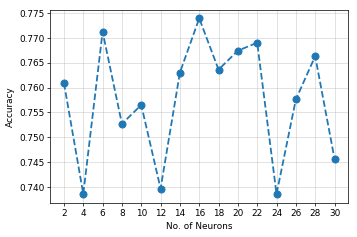

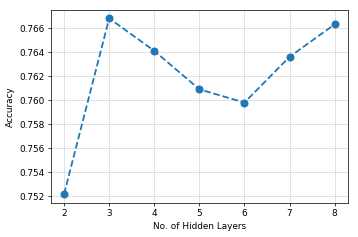

In [45]:
linear_neurons   = [[2,0.7609],[4,0.7386],[6,0.7712],[8,0.7527],[10,0.7565],[12,0.7397],[14,0.7630],[16,0.7739],[18,0.7636],[20,0.7674],[22,0.7690],[24,0.7386],[26,0.7576],[28,0.7663],[30,0.7457]]
linear_n_neurons = [i[1] for i in linear_neurons]
linear_n_number  = [i[0] for i in linear_neurons]
print linear_n_neurons
print linear_n_number
fig, ax = plt.subplots(dpi=64)
plt.plot(linear_n_number,linear_n_neurons,'o--',markersize=8,linewidth=2)
plt.grid(alpha=0.5);plt.xticks(linear_n_number)
plt.xlabel('No. of Neurons');plt.ylabel('Accuracy')
if False:
    plt.savefig(inPath+'Figures/linear_neurons_accuracy.png',dpi=400)

linear_hidden   = [[2,0.7522],[3,0.7668],[4,0.7641],[5,0.7609],[6,0.7598],[7,0.7636],[8,0.7663]]
linear_n_hidden = [i[1] for i in linear_hidden]
linear_n_number = [i[0] for i in linear_hidden]
# plotting# plotting number of hidden layers analysis for linear activation function
fig, ax = plt.subplots(dpi=64)
plt.plot(linear_n_number,linear_n_hidden,'o--',markersize=8,linewidth=2)
plt.grid(alpha=0.5);plt.xticks(linear_n_number)
plt.xlabel('No. of Hidden Layers');plt.ylabel('Accuracy')
if False:
    plt.savefig(inPath+'Figures/linear_hidden_accuracy.png',dpi=400)

[0.769, 0.7929, 0.7446, 0.7701, 0.7527, 0.7625, 0.7587, 0.7663, 0.7495, 0.7446, 0.7625, 0.7603, 0.7576, 0.7652, 0.7505]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


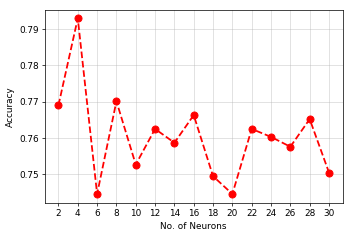

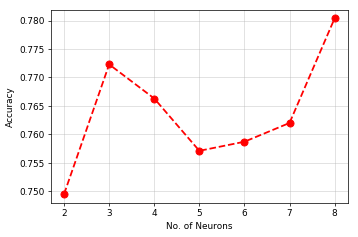

In [46]:
sigmoid_neurons   = [[2,0.7690],[4,0.7929],[6,0.7446],[8,0.7701],[10,0.7527],[12,0.7625],[14,0.7587],[16,0.7663],[18,0.7495],[20,0.7446],[22,0.7625],[24,0.7603],[26,0.7576],[28,0.7652],[30,0.7505]]
sigmoid_n_neurons = [i[1] for i in sigmoid_neurons]
sigmoid_n_number  = [i[0] for i in sigmoid_neurons]
print sigmoid_n_neurons
print sigmoid_n_number
# plotting number of neurons analysis for linear activation function
fig, ax = plt.subplots(dpi=64)
plt.plot(sigmoid_n_number,sigmoid_n_neurons,'ro--',markersize=8,linewidth=2)
plt.grid(alpha=0.5);plt.xticks(sigmoid_n_number)
plt.xlabel('No. of Neurons');plt.ylabel('Accuracy')
if False:
    plt.savefig(inPath+'Figures/sigmoid_neurons_accuracy.png',dpi=400)

sigmoid_hidden   = [[2,0.7495],[3,0.7723],[4,0.7663],[5,0.7571],[6,0.7587],[7,0.7620],[8,0.7804]]
sigmoid_n_hidden = [i[1] for i in sigmoid_hidden]
sigmoid_n_number = [i[0] for i in sigmoid_hidden]
# plotting# plotting number of hidden layers analysis for linear activation function
fig, ax = plt.subplots(dpi=64)
plt.plot(sigmoid_n_number,sigmoid_n_hidden,'ro--',markersize=8,linewidth=2)
plt.grid(alpha=0.5);plt.xticks(sigmoid_n_number)
plt.xlabel('No. of Neurons');plt.ylabel('Accuracy')
if False:
    plt.savefig(inPath+'Figures/sigmoid_hidden_accuracy.png',dpi=400)

### Dimensionality Reduction using PCA

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57)
pca_data = df_norm.iloc[:,0:-1]
pca.fit(pca_data)
var_explained = pca.explained_variance_ratio_
total_var_explained = []; count=0
for i in var_explained:
    if count==0:
        total_var_explained.append(i)
        count+=1
    else:
        total_var_explained.append(i+total_var_explained[count-1])
        count+=1

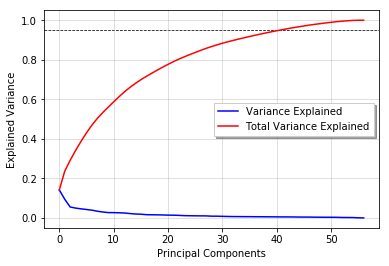

In [72]:
plt.plot(var_explained,'b',label='Variance Explained')
plt.plot(total_var_explained,'r',label='Total Variance Explained')
plt.grid(alpha=0.5); plt.legend(loc='best',fancybox=False,shadow=True)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.axhline(0.95,c='k',linestyle='--',linewidth=0.75,zorder=0)
if False:
    plt.savefig('./Figures/PCA_variance_explained.png',dpi=400)

In [79]:
# Finding number of principal components to use for 95% total variance explained
np.where(np.array(total_var_explained)>=0.949)[0][0]

41

In [82]:
pca = PCA(41)
lower_dim_data = pca.fit_transform(pca_data)
lower_dim_data = np.array(lower_dim_data)
print lower_dim_data.shape # checking dimensionality reduction

(4601L, 41L)


#### Now that the data is in a lower dimensional space, let's run our ANN using linear and sigmoid activation functions.

Starting with sigmoid activation function ANN using optimal parameters: 3 hidden layers and 4 hidden neurons per layer.

In [104]:
# ANN(data,n_inputs,n_hidden,n_neurons,n_outputs,activation_func,learning_rate)
X = ANN(lower_dim_data, #data
        41,  # number of inputs
        3,   # number of hidden layers
        4,   # number of neurons per hidden layer
        2,   # number of outputs (2)
        'sigmoid', # activation function
        0.3, # learning rate
        printer=False # prints error per epoch (used during diagnostic testing)
       )
number_of_epochs = 25  # number of epochs
split_in_training = 60 # % of data in training set
total_error,outputs = X.main(split_in_training,number_of_epochs)

TN,FN,TP,FP= predict_accuracy(X.data_test,outputs,prints=False)
Acc,TPR,PPV,TNR,F1=getMetrics(TN,FN,TP,FP)

====== Performance Metrics ======
	Acc.	: 0.7587
	F1	: 0.8628


Now, the linear activation function ANN using optimal parameters: 3 hidden layers and 6 hidden neurons per layer.

In [121]:
# ANN(data,n_inputs,n_hidden,n_neurons,n_outputs,activation_func,learning_rate)
X = ANN(lower_dim_data, #data
        41,  # number of inputs
        3,   # number of hidden layers
        6,   # number of neurons per hidden layer
        2,   # number of outputs (2)
        'linear', # activation function
        0.3, # learning rate
        printer=False # prints error per epoch (used during diagnostic testing)
       )
number_of_epochs = 25  # number of epochs
split_in_training = 60 # % of data in training set
total_error,outputs = X.main(split_in_training,number_of_epochs)
TN,FN,TP,FP= predict_accuracy(X.data_test,outputs,prints=False)
Acc,TPR,PPV,TNR,F1=getMetrics(TN,FN,TP,FP)

====== Performance Metrics ======
	Acc.	: 0.7022
	F1	: 0.8250
